# Comparison of online CCA algorithms on synthetic sources

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cca_algorithms import bio_cca

### Load desired dataset

In [2]:
X = np.load('datasets/synthetic/view1.npy')
Y = np.load('datasets/synthetic/view2.npy')

x_dim = X.shape[0]
y_dim = Y.shape[0]
samples = X.shape[1]

### Online algorithms

In [3]:
z_dim = 2; trials = 1

biocca_err = np.zeros((trials,samples))
msgcca_err = np.zeros((trials,samples))
genoja_err = np.zeros((trials,samples))

In [6]:
for i_trial in range(trials):
    
    print(f'Trial {i_trial+1} of out {trials}:')
    
    # Random permutation of the inputs

    idx = np.random.permutation(samples)
    
    biocca = bio_cca(z_dim, x_dim, y_dim)
    
    biocca_Y = np.zeros((z_dim,samples))
    
    print('Running online algorithms...')
    
    for i_sample in range(samples):

        x = X[:,idx[i_sample]]
        y = Y[:,idx[i_sample]]
        
        biocca_Y[:,i_sample] = biocca.fit_next(x,y)
                
    print('Computing errors...')

#     biocca_err[i_trial,:] = error(S[:,idx],bionica_Y)

#     print(f'Final Bio-CCA permutation error: {biocca_err[i_trial,-1]}')

Trial 1 of out 1:
Running online algorithms...
Computing errors...


### Comparison plots

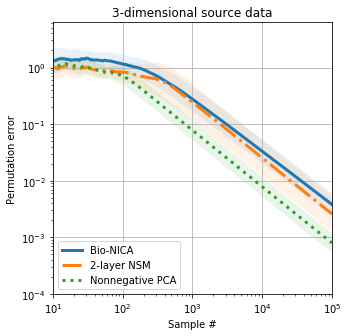

In [5]:
linewidth = 3

t = list(range(samples))

fig = plt.figure(figsize=(5,5))

ax = plt.subplot(1, 1, 1)

add_fill_lines(ax, t, bionica_err, plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-NICA'})
add_fill_lines(ax, t, nsm_err, plot_kwargs={'ls': '-.', 'lw': linewidth, 'label': '2-layer NSM'})
add_fill_lines(ax, t, npca_err, plot_kwargs={'ls': ':', 'lw': linewidth, 'label': 'Nonnegative PCA'})

ax.loglog()

plt.title(f"{s_dim}-dimensional source data")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Sample #')
plt.ylabel('Permutation error')
plt.xlim((10,samples))
# plt.ylim(bottom=10**-4,)
plt.ylim(10**-4,10**.8)

plt.show()